<a href="https://colab.research.google.com/github/adalves-ufabc/2024.Q2-PLN/blob/main/2024_Q2_PLN_EXTRA_Notebook_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2024-Q2]**
Prof. Alexandre Donizeti Alves

## **APIs**
---



**API** (*Application Programming Interface*) é um conjunto de definições e protocolos que permite a comunicação entre diferentes sistemas de software. As APIs facilitam a integração e a interação entre aplicações, serviços e dispositivos, fornecendo métodos padronizados para acessar funcionalidades ou dados de um sistema a partir de outro.

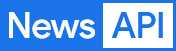

https://newsapi.org/

A API `News` fornece resultados de pesquisa em formato JSON para artigos de notícias atuais e históricos.

In [ ]:
from getpass import getpass

NEWS_API_KEY = getpass()

··········


**Pesquise artigos de notícias que mencionem um tópico ou palavra-chave específica**

`https://newsapi.org/docs/endpoints/everything`

In [ ]:
import requests

url = ('https://newsapi.org/v2/everything?'
       'q=Olímpiada&'
       'from=2024-07-28&'
       'to=2024-07-29&'
       'language=pt&' #ar de en es fr he it nl no pt ru sv ud zh
       'sortBy=popularity&' # relevancy popularity publishedAt
       'apiKey=' + NEWS_API_KEY)

resposta = requests.get(url)

In [ ]:
resposta.json()

{'status': 'ok',
 'totalResults': 7,
 'articles': [{'source': {'id': None, 'name': 'Uol.com.br'},
   'author': 'Igor Nishikiori',
   'title': 'Brasil x Japão: onde assistir ao jogo da seleção feminina de futebol',
   'description': 'Equipes se enfrentam pela fase de grupos da Olimpíada neste domingo (28) em Paris. Veja quem transmite! \nThe post Brasil x Japão: onde assistir ao jogo da seleção feminina de futebol appeared first on Giz Brasil.',
   'url': 'https://gizmodo.uol.com.br/onde-assistir-brasil-japao-futebol-feminino-paris-2024/',
   'urlToImage': 'https://gizmodo.uol.com.br/wp-content/blogs.dir/8/files/2024/07/bras.jpg',
   'publishedAt': '2024-07-28T10:00:14Z',
   'content': 'A seleção feminina de futebol enfrenta o Japão neste domingo (28) pela segunda rodada da fase de grupos dos Jogos Olímpicos de Paris, no Parc des Princes. A seleção Canarinho está na vice-liderança d… [+1679 chars]'},
  {'source': {'id': None, 'name': 'Terra.com.br'},
   'author': 'Redação Terra',
   'ti

In [ ]:
import pandas as pd

# carregar o JSON
dados = resposta.json()

# converter JSON em DataFrame
df = pd.json_normalize(dados['articles'])

# exibir o DataFrame
print(df.head())

                       author  \
0             Igor Nishikiori   
1               Redação Terra   
2  Felipe Nunes, Felipe Nunes   
3      iG Esporte, iG Esporte   
4      iG Esporte, iG Esporte   

                                               title  \
0  Brasil x Japão: onde assistir ao jogo da seleç...   
1  Como assim o Taiti é na França? Conheça a Poli...   
2  Céline Dion deixa Paris e agradece por retorno...   
3  Esgrima: Guilherme\nToldo perde na estreia e é...   
4  Olímpiada: Guilherme Cachorrão fica fora da fi...   

                                         description  \
0  Equipes se enfrentam pela fase de grupos da Ol...   
1  Disputas do surfe ocorrem na praia de Teahupo'...   
2  Artista voltou aos palcos após cinco anos e já...   
3  Atleta brasileiro disputava sua quarta edição ...   
4  Nadador brasileiro não conseguiu emplacar bom ...   

                                                 url  \
0  https://gizmodo.uol.com.br/onde-assistir-brasi...   
1  https://www.

In [ ]:
print(dados['totalResults'])

7


**Obtenha as principais manchetes atuais de um país ou categoria**

`https://newsapi.org/docs/endpoints/top-headlines`

In [ ]:
import requests

url = ('https://newsapi.org/v2/top-headlines?country=br&'
       'pageSize=100&'
       'apiKey=' + NEWS_API_KEY)

resposta = requests.get(url)

In [ ]:
dados = resposta.json()

print(dados['totalResults'])

34


In [ ]:
dados

{'status': 'ok',
 'totalResults': 34,
 'articles': [{'source': {'id': 'google-news', 'name': 'Google News'},
   'author': 'UOL Confere',
   'title': 'Motociclista é morto atropelado por motorista de Porsche na zona sul de SP - UOL Confere',
   'description': None,
   'url': 'https://news.google.com/rss/articles/CBMikAFodHRwczovL25vdGljaWFzLnVvbC5jb20uYnIvY290aWRpYW5vL3VsdGltYXMtbm90aWNpYXMvMjAyNC8wNy8yOS9tb3RvY2ljbGlzdGEtZS1tb3J0by1hdHJvcGVsYWRvLXBvci1tb3RvcmlzdGEtZGUtcG9yc2NoZS1uYS16b25hLXN1bC1kZS1zcC5odG3SAQA?oc=5',
   'urlToImage': None,
   'publishedAt': '2024-07-29T12:05:12Z',
   'content': None},
  {'source': {'id': 'google-news', 'name': 'Google News'},
   'author': 'UOL Confere',
   'title': 'Reinaldo Azevedo: Maduro e a "democracia do inimigo". Ou: Fascistas que falam com aves e cães - UOL Confere',
   'description': None,
   'url': 'https://news.google.com/rss/articles/CBMiiwFodHRwczovL25vdGljaWFzLnVvbC5jb20uYnIvY29sdW5hcy9yZWluYWxkby1hemV2ZWRvLzIwMjQvMDcvMjkvbWFkdXJvLWUtYS1k

In [ ]:
# Extrair e listar títulos dos artigos
titulos = [article['title'] for article in dados['articles']]

# Exibir os títulos
for title in titulos:
    print(title)

Motociclista é morto atropelado por motorista de Porsche na zona sul de SP - UOL Confere
Reinaldo Azevedo: Maduro e a "democracia do inimigo". Ou: Fascistas que falam com aves e cães - UOL Confere
Atlético-MG vence o Corinthians e se recupera no Brasileirão - O Antagonista
Nicole Kidman foi muito gente como a gente nas Olimpíadas - Splash
Classificada para a semi, Rafaela Silva jamais tomou um golpe em Olimpíadas - Globo.com
Ibovespa Ao Vivo: Confira o que movimenta Bolsa, Dólar e Juros nesta segunda - InfoMoney
Nova sabotagem nas Olimpíadas atinge fibras óticas e afeta a internet - Metrópoles
Ônibus para com defeito em cima de linha férrea e é atropelado por trem em MG - Itatiaia
iPhone: veja 5 dicas para melhorar o uso e a segurança do celular da Apple - G1
Fábio Porchat chora ao lembrar de relação conturbada com Jô Soares: 'Só porrada' - Notícias da TV
José Eduardo gera ciúmes na Globo por causa de Davi Brito; entenda - BNews
Bispo chama paródia da Última Ceia nas Olimpíadas de "hed

`https://newsapi.org/docs/endpoints/sources`

In [ ]:
import requests

url = ('https://newsapi.org/v2/top-headlines?'
       'sources=bbc-news&'
       'apiKey=' + NEWS_API_KEY)

resposta = requests.get(url)

In [ ]:
resposta.json()

{'status': 'ok',
 'totalResults': 10,
 'articles': [{'source': {'id': 'bbc-news', 'name': 'BBC News'},
   'author': 'BBC News',
   'title': 'Biden calls for Supreme Court term limits and ethics rules',
   'description': "The US president's proposals are unlikely to pass Congress but the aim is to galvanise Democratic voters.",
   'url': 'https://www.bbc.co.uk/news/articles/cw4yz3nw0vyo',
   'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/d0f2/live/ce9992b0-4d9d-11ef-ba3c-e10a62be783c.jpg',
   'publishedAt': '2024-07-29T12:22:17.0801377Z',
   'content': 'Democrats, however, hope that pushing for reform can help galvanise voters ahead of the November 2024 election. \r\nThe Supreme Court has ruled on a string of historic cases in the last two years, star… [+1284 chars]'},
  {'source': {'id': 'bbc-news', 'name': 'BBC News'},
   'author': 'BBC News',
   'title': 'Man arrested in France over suspected railway vandalism',
   'description': 'Police sources told local media the 2